# Visualization Creation for Stats

Here I will plot the (manually) collected results from the backtesting.

Results were produced by the other notebook (only the "sell horizon" parameter was changed)

*(Code here is duplicated, and quite crappy. I only wanted to create pretty plots, these won't be reused ever)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Buy And Hold (and repeat)

In [2]:
# Values are: (nb_neg_return, nb_pos_return, return_mean, return_median)
hold_results = {1: (543, 170, -4.854356827159822, -3.011536590576179),
                2: (523, 190, -4.388444272957948, -3.371403350830087),
                5: (481, 232, -3.039593245566169, -2.724342590332083),
                10: (455, 258, -3.0977166393622713, -3.42915859985352),
                30: (385, 328, 1.848991565331101, -1.9344852294921906),
                60: (348, 365, 9.750032702013764, 0.6996536254882585),
                90: (329, 383, 12.109622220755437, 2.705466440200803),
                120: (295, 418, 17.63430132436048, 5.150333183288581),
                240: (227, 486, 31.576162330847115, 12.196797821044925),
                365: (215, 498, 38.80414885588127, 18.16746044921874),
                373: (185, 528, 42.67458882068666, 20.850483856201162)}

In [3]:
def create_df(results:dict, index_name):
    results_df = pd.DataFrame(results).T
    results_df.index.name = index_name
    results_df.columns = ["Negative Returns", "Positive Returns", "Mean Return %", "Median Return %"]
    return results_df

In [4]:
results_df = create_df(hold_results, "Days Held")

In [5]:
results_df

,Negative Returns,Positive Returns,Mean Return %,Median Return %
Days Held,,,,
1,543.0,170.0,-4.854357,-3.011537
2,523.0,190.0,-4.388444,-3.371403
5,481.0,232.0,-3.039593,-2.724343
10,455.0,258.0,-3.097717,-3.429159
30,385.0,328.0,1.848992,-1.934485
60,348.0,365.0,9.750033,0.699654
90,329.0,383.0,12.109622,2.705466
120,295.0,418.0,17.634301,5.150333
240,227.0,486.0,31.576162,12.196798


In [6]:
# print(results_df.to_markdown())

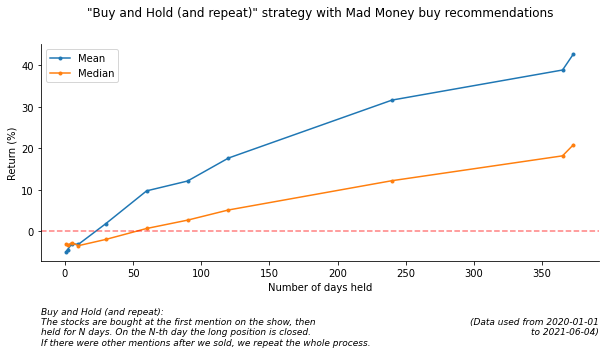

In [7]:
x = list(hold_results.keys())
y_mean = [hold_results[k][2] for k in x]
y_median = [hold_results[k][3] for k in x]

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x, y_mean, marker=".", linestyle="-", label="Mean")
ax.plot(x, y_median, marker=".", linestyle="-", label="Median")
ax.set_xlabel("Number of days held")
ax.set_ylabel("Return (%)")
ax.axhline(0, color="r", alpha=0.5, linestyle="--")
ax.set_title("\"Buy and Hold (and repeat)\" strategy with Mad Money buy recommendations", y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
ax.annotate("Buy and Hold (and repeat):\nThe stocks are bought at the first mention on the show, then\n\
held for N days. On the N-th day the long position is closed. \n\
If there were other mentions after we sold, we repeat the whole process.",
            xy = (0, -0.3),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9,
            style="italic")
ax.annotate("(Data used from 2020-01-01\nto 2021-06-04)",
            xy = (1, -0.3),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=9,
            style="italic");

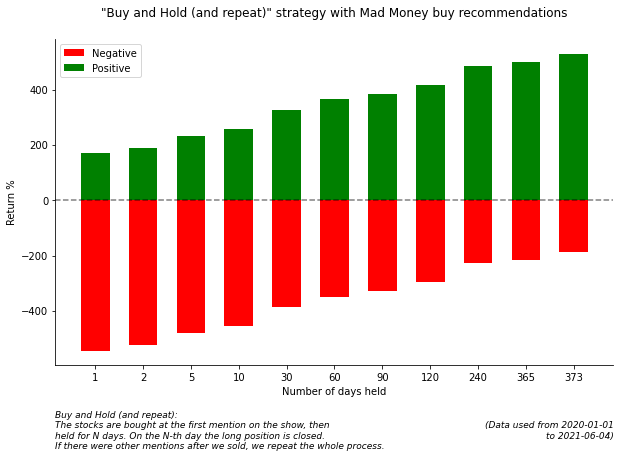

In [8]:
x = list(hold_results.keys())
x_ticks = list(range(len(x)))
y_neg = [hold_results[k][0] for k in x]
y_pos = [hold_results[k][1] for k in x]

bar_width = 0.6

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(x_ticks, -1*np.array(y_neg), width=bar_width, color="r", label="Negative")
ax.bar(x_ticks, y_pos, width=bar_width, color="g", label="Positive")
ax.legend()
ax.axhline(0, color="black", linestyle="--", alpha=0.5)
ax.set_xticks(x_ticks)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(x)
ax.set_xlabel("Number of days held")
ax.set_ylabel("Return %")
ax.set_title("\"Buy and Hold (and repeat)\" strategy with Mad Money buy recommendations", y=1.05)
ax.annotate("Buy and Hold (and repeat):\nThe stocks are bought at the first mention on the show, then\n\
held for N days. On the N-th day the long position is closed. \n\
If there were other mentions after we sold, we repeat the whole process.",
            xy = (0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9,
            style="italic")
ax.annotate("(Data used from 2020-01-01\nto 2021-06-04)",
            xy = (1, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=9,
            style="italic");

# Short term investments (Cramer effect)

In [9]:
results = {"AfterShowBuyNextDayCloseSell": (546, 166, -5.012256277795992, -3.1201426010131854),
           "AfterShowBuyNextDayOpenSell": (570, 142, -5.100327785915943, -3.16921109008789),
           "NextDayOpenBuyNextDayCloseSell": (543, 169, 0.8384597994257941, -2.9403008632659917)}

In [10]:
results_df = create_df(results, "Strategy")

In [11]:
results_df

,Negative Returns,Positive Returns,Mean Return %,Median Return %
Strategy,,,,
AfterShowBuyNextDayCloseSell,546.0,166.0,-5.012256,-3.120143
AfterShowBuyNextDayOpenSell,570.0,142.0,-5.100328,-3.169211
NextDayOpenBuyNextDayCloseSell,543.0,169.0,0.838460,-2.940301


In [12]:
# print(results_df.to_markdown())